# Sequence Models & How to use them

**학습목표**
1. RNN, LSTM, GRU의 구조를 이해한다.
2. 위 모델을 사용하기 위한 데이터 구조를 이해한다.
3. 위 모든 내용을 코딩할 수 있다.

-----------------
* Thanks to : 한기영 대표님 @ Data Insight

## 1.환경 및 데이터 준비

### Import Packages

In [3]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.metrics import *

### Data Loading

In [4]:
url = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/Stock_Edwards_Lifesciences_corporation.csv'

# 판다스로 데이터를 불러오시오.
data = pd.read_csv(url)
data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [5]:
data.shape

(4392, 7)

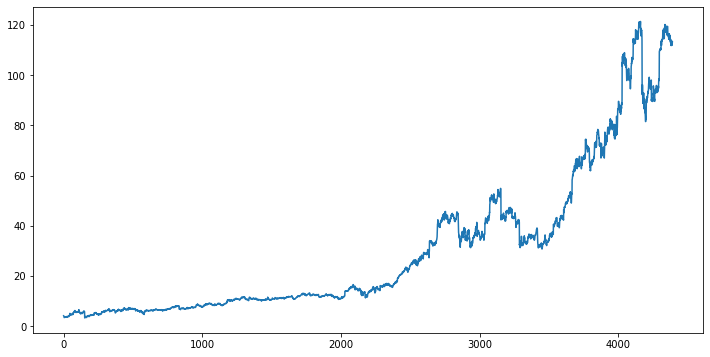

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close)
plt.show()

##3.데이터 준비

### Date 컬럼을 제거하시오.

In [7]:
data = data.drop('Date', axis=1)

## 4.Sequence 데이터 구조로 만들기

**조건**
* 내일의 Close를 예측할 것이다. 이를 Y로 둘 것.
* timestep은 4주를 본다. (주식은 5일이 1주일)
* 맞추어 전처리

**데이터 분할 규칙**
* 가장 최근 1주일을 테스트 데이터로 둔다.
* 테스트 데이터를 제외하고, 가장 최근 2주를 벨리데이션 데이터로 둔다.

In [8]:
# 판다스 데이터 프레임을 넘파이로 옮김.
data = data.values

In [9]:
timestep= 20 

x = [ ]  # x를 담을 빈 공간
y = [ ]  # y를 담을 빈 공간

x = np.array([data[i:i+timestep] for i in range(len(data) - timestep)])
y = np.array([data[i+timestep, -3] for i in range(len(data) - timestep)])

x_train, x_val, x_test = x[:-15], x[-15:-5], x[-5:]
y_train, y_val, y_test = y[:-15], y[-15:-5], y[-5:]

print(x.shape, y.shape)
print('-------------------------------')
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)
print('-------------------------------')
print('[ # , timestep, feature수 ] <-- 데이터의 구조 : ')

(4372, 20, 6) (4372,)
-------------------------------
(4357, 20, 6) (4357,)
(10, 20, 6) (10,)
(5, 20, 6) (5,)
-------------------------------
[ # , timestep, feature수 ] <-- 데이터의 구조 : 


데이터의 구조 : [n, timestep, feature수]

# Q.1. 단순 RNN복습

1. 적절한 인풋 레이어를 구성할 것
2. 첫번째 히든레이어 : SimpleRNN
    * 히든스테이트 노드 16개, return_sequences=True
3. 두번째 히든레이어 : SimpleRNN
    * 히든스테이트 노드 32개, return_sequences=True
4. 플래튼
5. 회귀를 위한 적절한 아웃풋 레이어

In [ ]:
####################
## Your Code Here ##
####################
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(20, 6)))
model.add(tf.keras.layers.SimpleRNN(16, activation='tanh', return_sequences=True))
model.add(tf.keras.layers.SimpleRNN(32, activation='tanh', return_sequences=True))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mse',
              optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20, 16)            368       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20, 32)            1568      
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dense (Dense)               (None, 1)                 641       
                                                                 
Total params: 2,577
Trainable params: 2,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## 학습도 시킬 것
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                    epochs=30)

Epoch 1/30
137/137 [==============================] - 7s 15ms/step - loss: 6004543586304.0000 - val_loss: 1691663466496.0000
Epoch 2/30
137/137 [==============================] - 1s 10ms/step - loss: 6004179206144.0000 - val_loss: 1691426488320.0000
Epoch 3/30
137/137 [==============================] - 1s 10ms/step - loss: 6003833700352.0000 - val_loss: 1691197767680.0000
Epoch 4/30
137/137 [==============================] - 1s 10ms/step - loss: 6003500777472.0000 - val_loss: 1690971537408.0000
Epoch 5/30
137/137 [==============================] - 1s 10ms/step - loss: 6003169951744.0000 - val_loss: 1690747928576.0000
Epoch 6/30
137/137 [==============================] - 1s 10ms/step - loss: 6002840698880.0000 - val_loss: 1690526154752.0000
Epoch 7/30
137/137 [==============================] - 1s 10ms/step - loss: 6002509348864.0000 - val_loss: 1690303594496.0000
Epoch 8/30
137/137 [==============================] - 2s 14ms/step - loss: 6002183766016.0000 - val_loss: 1690082344960.0000


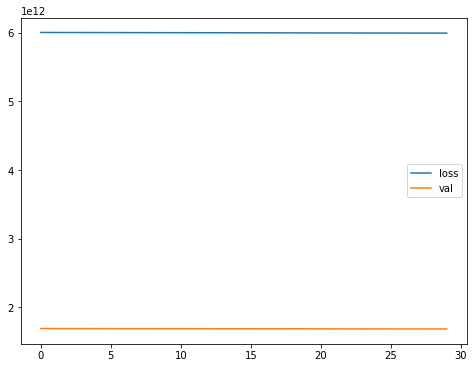

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val'])
plt.show()

In [ ]:
# Q1. 테스트 셋에서의 RMSE를 출력하여라.
y_pred = model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1/1 [==============================] - 0s 260ms/step
1603124.0750825822


# Q.2. LSTM, GRU 복습

1. 적절한 인풋 레이어를 구성할 것
2. 첫번째 히든레이어 : LSTM
    * 히든스테이트 노드 16개, return_sequences=True
3. 두번째 히든레이어 : GRU
    * 히든스테이트 노드 32개, return_sequences=True
4. 플래튼
5. Fully Connected Layer, 노드 128개, swish
5. 회귀를 위한 적절한 아웃풋 레이어

In [ ]:
from keras.backend import clear_session
from keras.layers import Input, Dense, Flatten, LSTM, GRU
from keras.models import Model

In [ ]:
x_train.shape, y_train.shape

((4357, 20, 6), (4357,))

In [ ]:
####################
## Your Code Here ##
####################
# 1. 이전 세션 클리어
clear_session()
# 2. 모델 엮기
il = Input(shape = (20, 6))

hl = LSTM(16, return_sequences = True)(il)
hl = GRU(32, return_sequences = True)(hl)
hl = Flatten()(hl)
hl = Dense(128, activation = 'swish')(hl)

ol = Dense(1)(hl)
# 3. 모델 생성
model = Model(il, ol)
# 4. 컴파일
model.compile(loss = 'mae', optimizer = 'adam')
# 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20, 6)]           0         
                                                                 
 lstm (LSTM)                 (None, 20, 16)            1472      
                                                                 
 gru (GRU)                   (None, 20, 32)            4800      
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dense (Dense)               (None, 128)               82048     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 88,449
Trainable params: 88,449
Non-trainable p

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 7,
                   restore_best_weights = True)

In [ ]:
x_train.shape

(4357, 20, 6)

In [ ]:
## 학습도 시킬 것
model.fit(x_train, y_train, epochs = 1000, callbacks = [es], validation_data=(x_val, y_val), verbose = 1)


Epoch 1/30
137/137 [==============================] - 4s 27ms/step - loss: 2481.8828 - val_loss: 1264310.5000
Epoch 2/30
137/137 [==============================] - 3s 23ms/step - loss: 21.9413 - val_loss: 1264323.6250
Epoch 3/30
137/137 [==============================] - 4s 26ms/step - loss: 22.4493 - val_loss: 1264319.1250
Epoch 4/30
137/137 [==============================] - 4s 29ms/step - loss: 22.3484 - val_loss: 1264326.8750
Epoch 5/30
137/137 [==============================] - 3s 22ms/step - loss: 22.2851 - val_loss: 1264312.7500
Epoch 6/30
137/137 [==============================] - 4s 31ms/step - loss: 22.1526 - val_loss: 1264320.0000
Epoch 6: early stopping


In [ ]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
# Q1. 테스트 셋에서의 RMSE를 출력하여라.
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)**0.5

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, SimpleRNN, Input, LSTM, GRU, Bidirectional, MaxPool1D, Conv1D
from tensorflow.keras.models import Model

In [16]:
tf.keras.backend.clear_session()

il = Input(shape=(20,6))

hl = Conv1D(filters=16,
            kernel_size=5,
            activation='relu',
            padding='same')(il)
hl = Conv1D(filters=16,
            kernel_size=5,
            activation='relu',
            padding='same')(hl)
hl = MaxPool1D(2)(hl)
hl = Bidirectional(layer = LSTM(32 ,return_sequences=True))(hl)

forward_gru = GRU(32, return_sequences=True)
backward_lstm = LSTM(24, return_sequences=True, go_backwards=True)
hl = Bidirectional(layer = forward_gru, backward_layer = backward_lstm)(hl)

hl = Flatten()(hl)
ol = Dense(1, activation='relu')(hl)

model = Model(il, ol)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20, 6)]           0         
                                                                 
 conv1d (Conv1D)             (None, 20, 16)            496       
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 16)            1296      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 16)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 10, 64)           12544     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 10, 56)           17952 

In [17]:
model.compile(loss='mae', optimizer='adam')

In [18]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30)

Epoch 1/30
137/137 [==============================] - 24s 69ms/step - loss: 29.1738 - val_loss: 97.7933
Epoch 2/30
137/137 [==============================] - 5s 33ms/step - loss: 21.4382 - val_loss: 98.6957
Epoch 3/30
137/137 [==============================] - 3s 22ms/step - loss: 21.4401 - val_loss: 99.1970
Epoch 4/30
137/137 [==============================] - 4s 33ms/step - loss: 21.4142 - val_loss: 97.5281
Epoch 5/30
137/137 [==============================] - 3s 23ms/step - loss: 21.3998 - val_loss: 100.3973
Epoch 6/30
137/137 [==============================] - 3s 23ms/step - loss: 21.4145 - val_loss: 97.7647
Epoch 7/30
137/137 [==============================] - 3s 25ms/step - loss: 21.4394 - val_loss: 98.3273
Epoch 8/30
137/137 [==============================] - 6s 41ms/step - loss: 21.4167 - val_loss: 96.7232
Epoch 9/30
137/137 [==============================] - 3s 22ms/step - loss: 21.4264 - val_loss: 99.2050
Epoch 10/30
137/137 [==============================] - 3s 23ms/step - l

In [ ]:
plt.plot()

In [19]:
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)**0.5

1/1 [==============================] - 2s 2s/step


98.84813685201343